In [96]:
!pip install yfinance
#!pip install pandas
#!pip install requests
!pip install bs4
#!pip install plotly

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

with requests.Session() as se:
    se.headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.110 Safari/537.36",
        "Accept-Encoding": "gzip, deflate",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
        "Accept-Language": "en"
    }

#Define Graphing Function
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

**Question 1:  Extracting Tesla Stock Data Using yfinance**

Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is TSLA

In [97]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function history extract stock information and save it in a dataframe named tesla_data. Set the period parameter to max so we get information for the maximum amount of time.

In [98]:
tesla_data = tesla.history(period="max")

Reset the index using the reset_index(inplace=True) function on the tesla_data DataFrame and display the first five rows of the tesla_data dataframe using the head function.

In [99]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0









**Question 2: Extracting Tesla Revenue Data Using Webscraping**

Use the requests library to download the webpage https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue. Save the text of the response as a variable named html_data.

In [110]:
tesla_url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 11_4) AppleWebKit/537.36 '
                  '(KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36',
    'Referer': 'https://www.sex.com/'
}
tesla_html_data = requests.get(tesla_url, headers=headers).text

Parse the html data using beautiful_soup.


In [111]:
tesla_soup = BeautifulSoup(tesla_html_data, "html5lib")

Using beautiful soup extract the table with Tesla Quarterly Revenue and store it into a dataframe named tesla_revenue. The dataframe should have columns Date and Revenue. Make sure the comma and dollar sign is removed from the Revenue column.

In [112]:
tesla_tables = tesla_soup.find_all('table')
for index,table in enumerate(tesla_tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        tesla_table_index = index
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in tesla_tables[tesla_table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col !=[]):
        date = col[0].text
        revenue = col[1].text.replace("$", "").replace(",", "")
        tesla_revenue = tesla_revenue.append({"Date" : date, "Revenue" : revenue}, ignore_index=True)

Remove the rows in the dataframe that are empty strings or are NaN in the Revenue column. Print the entire tesla_revenue DataFrame to see if you have any.

In [113]:
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue

,Date,Revenue
0,2023-06-30,24927
1,2023-03-31,23329
2,2022-12-31,24318
3,2022-09-30,21454
4,2022-06-30,16934
5,2022-03-31,18756
6,2021-12-31,17719
7,2021-09-30,13757
8,2021-06-30,11958
9,2021-03-31,10389


Display the last 5 row of the tesla_revenue dataframe using the tail function.

In [114]:
tesla_revenue.tail()

,Date,Revenue
51,2010-09-30,31
52,2010-06-30,28
53,2010-03-31,21
55,2009-09-30,46
56,2009-06-30,27


**Question 3:   Extracting GameStop Stock Data Using yfinance**


In [115]:
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


**Question 4:  Extracting GameStop Revenue Data Using Webscraping**

Use the requests library to download the webpage https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue. Save the text of the response as a variable named html_data.

In [118]:
gme_url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 11_4) AppleWebKit/537.36 '
                  '(KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36',
    'Referer': 'https://www.sex.com/'
}
gme_html_data = requests.get(gme_url,headers=headers).text

In [119]:
gme_soup = BeautifulSoup(gme_html_data, "html5lib")

In [126]:
gme_tables = gme_soup.find_all('table')

for index,table in enumerate(gme_tables):
    if ("GameStop Quarterly Revenue" in str(table)):
        gme_table_index = index

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in gme_tables[gme_table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col !=[]):
        date = col[0].text
        revenue = col[1].text.replace("$", "").replace(",", "")
        gme_revenue = gme_revenue.append({"Date" : date, "Revenue" : revenue}, ignore_index=True)

In [125]:
gme_revenue.tail()

,Date,Revenue
53,2010-01-31,3524
54,2009-10-31,1835
55,2009-07-31,1739
56,2009-04-30,1981
57,2009-01-31,3492


**Question 5:  Tesla Stock and Revenue Dashboard**

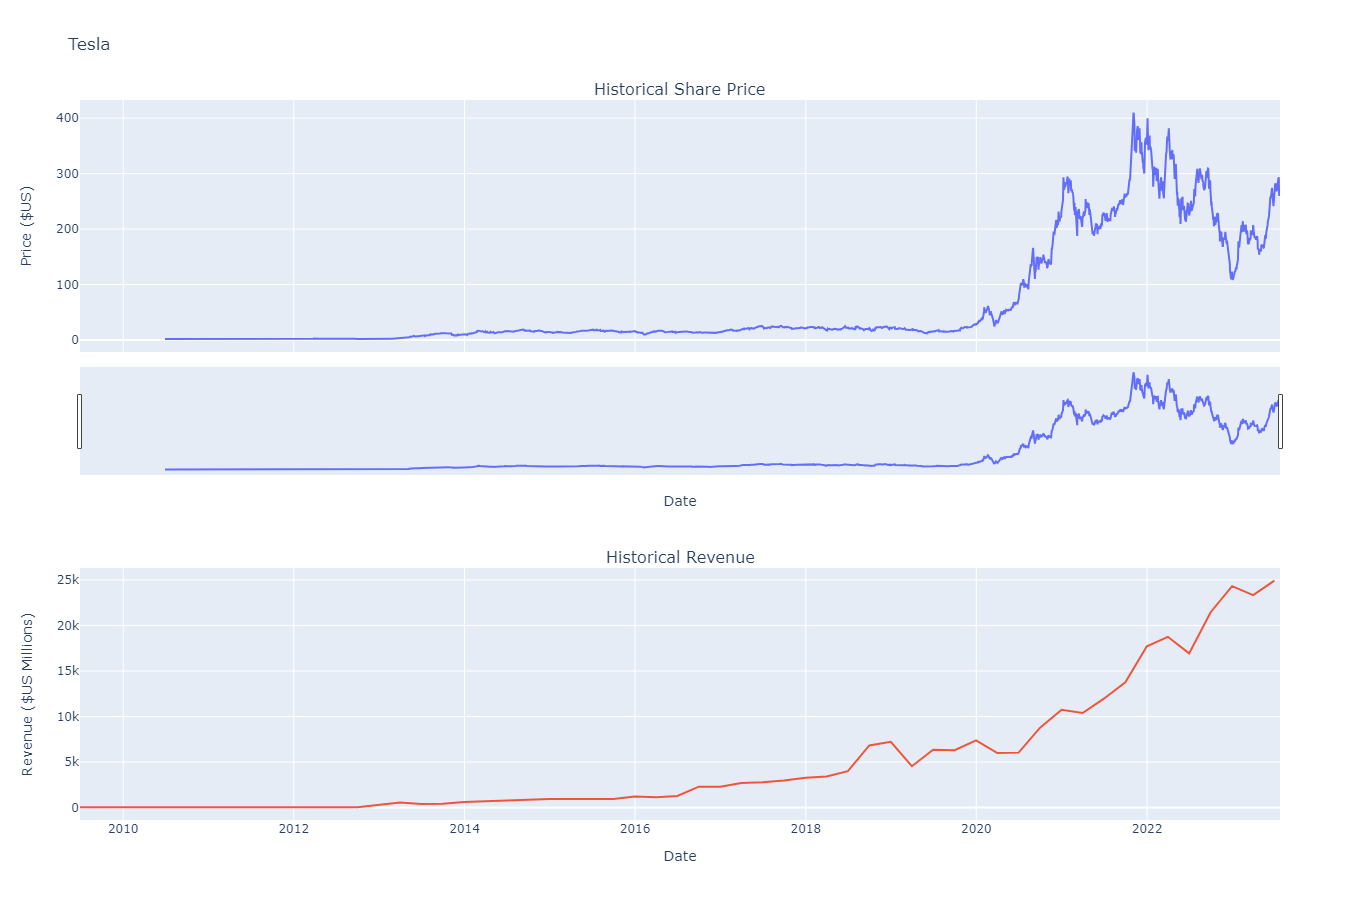

In [122]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

**Question 6:  GameStop Stock and Revenue Dashboard**

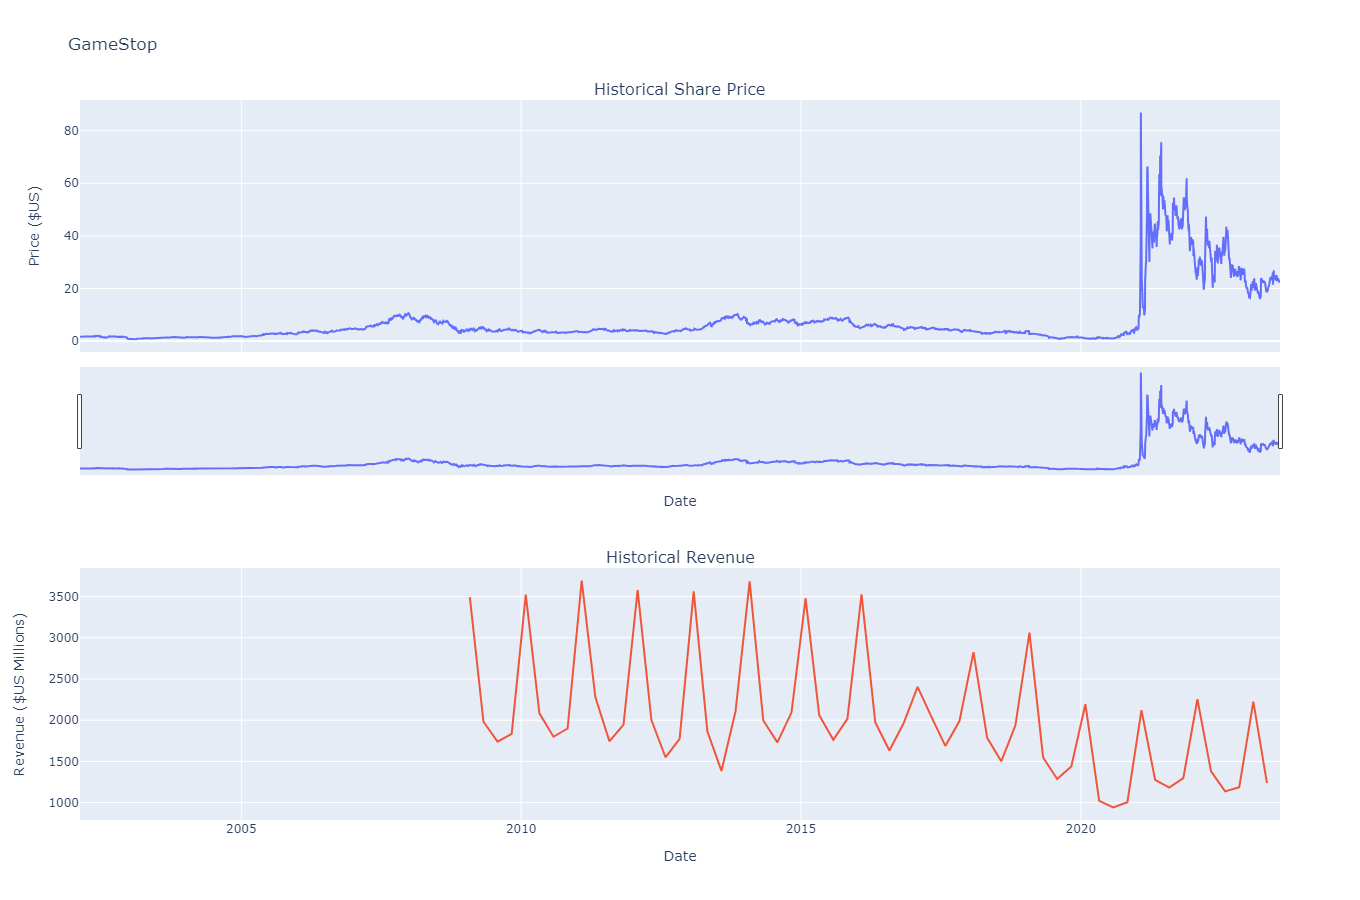

In [123]:
make_graph(gme_data, gme_revenue, 'GameStop')